In [2]:
import os
import numpy as np
import librosa
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
dataset_path = '/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/'

## Features & EDA

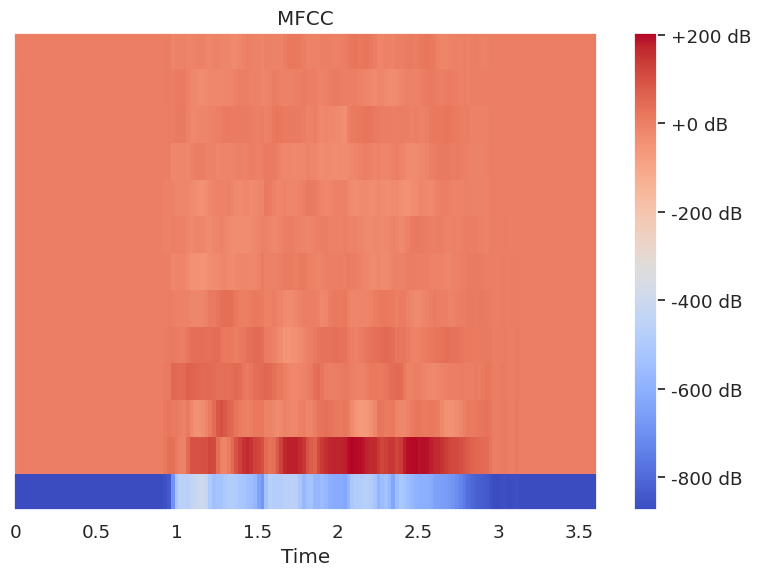

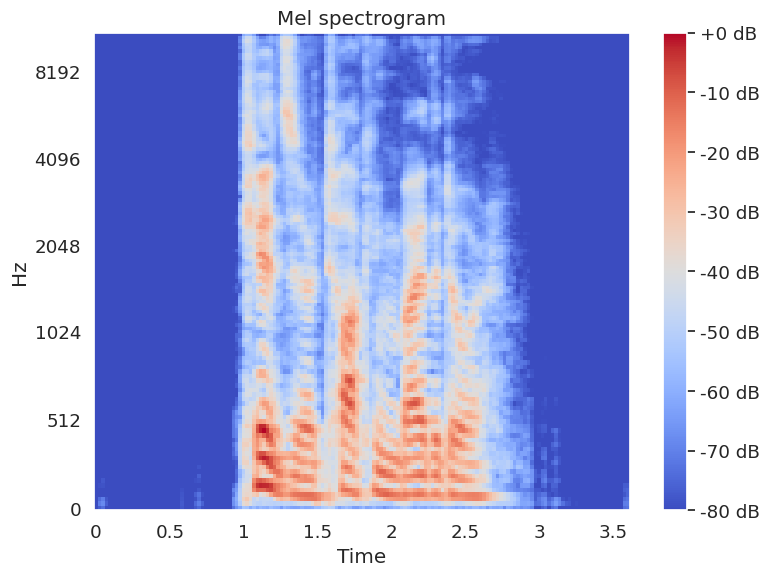

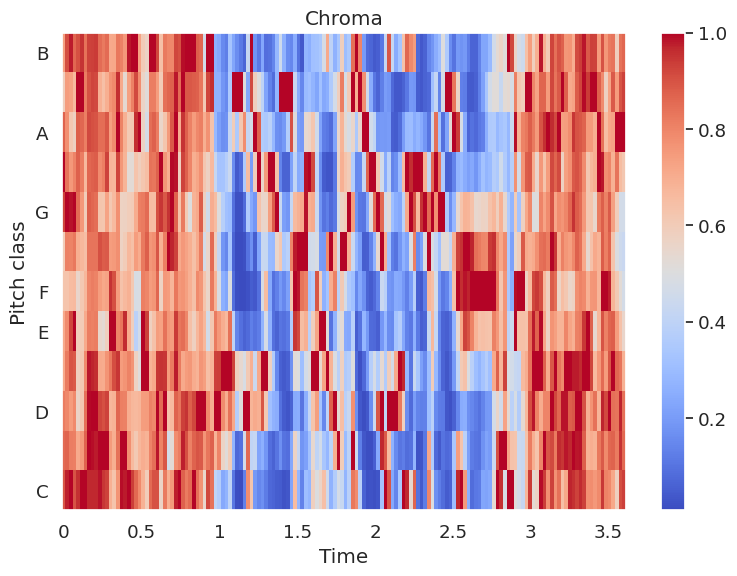

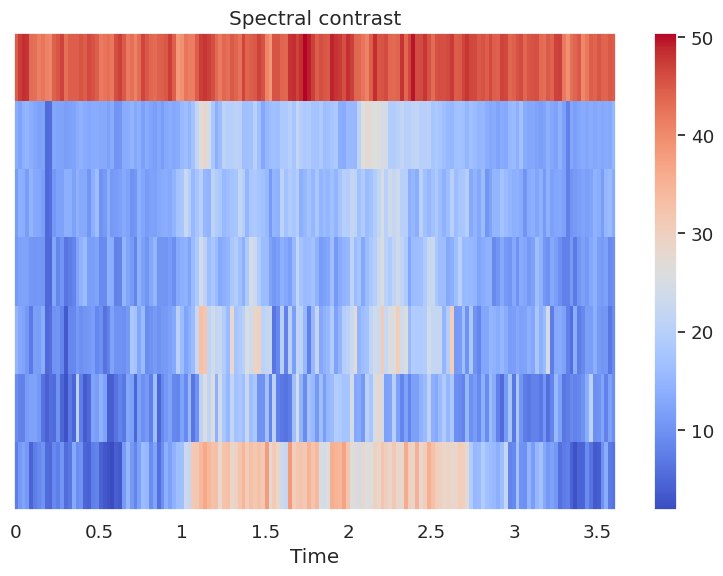

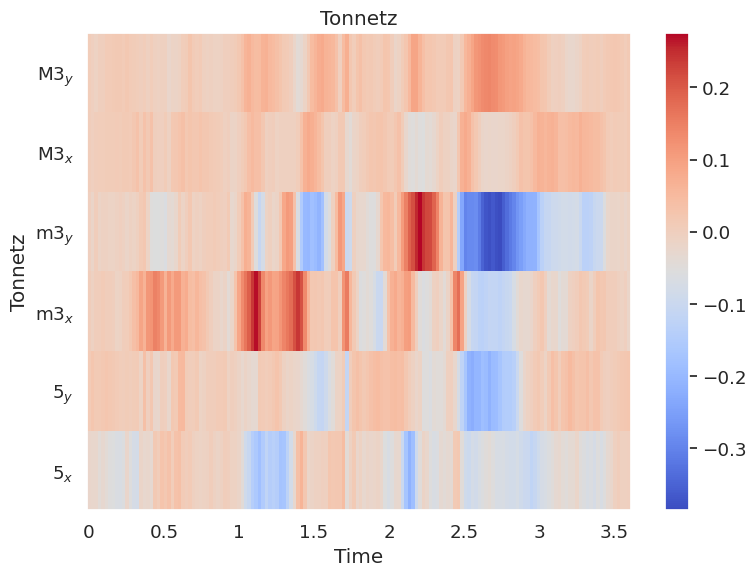

In [48]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load audio file
y, sr = librosa.load('/kaggle/input/ravdess-emotional-speech-audio/Actor_01/03-01-02-01-01-02-01.wav')

# Extract MFCC features
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# Extract Mel spectrogram features
mel_spec = librosa.feature.melspectrogram(y=y, sr=sr)

# Extract chroma features
chroma = librosa.feature.chroma_stft(y=y, sr=sr)

# Extract spectral contrast features
contrast = librosa.feature.spectral_contrast(y=y, sr=sr)

# Extract Tonnetz features
tonnetz = librosa.feature.tonnetz(y=y, sr=sr)

# Visualize MFCC features
plt.figure(figsize=(8, 6))
librosa.display.specshow(mfcc, x_axis='time', cmap='coolwarm')
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC')
plt.tight_layout()

# Visualize Mel spectrogram features
plt.figure(figsize=(8, 6))
librosa.display.specshow(librosa.power_to_db(mel_spec, ref=np.max), y_axis='mel', x_axis='time', cmap='coolwarm')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

# Visualize chroma features
plt.figure(figsize=(8, 6))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', cmap='coolwarm')
plt.colorbar()
plt.title('Chroma')
plt.tight_layout()

# Visualize spectral contrast features
plt.figure(figsize=(8, 6))
librosa.display.specshow(contrast, x_axis='time', cmap='coolwarm')
plt.colorbar()
plt.title('Spectral contrast')
plt.tight_layout()

# Visualize Tonnetz features
plt.figure(figsize=(8, 6))
librosa.display.specshow(tonnetz, y_axis='tonnetz', x_axis='time', cmap='coolwarm')
plt.colorbar()
plt.title('Tonnetz')
plt.tight_layout()

# Show all plots
plt.show()


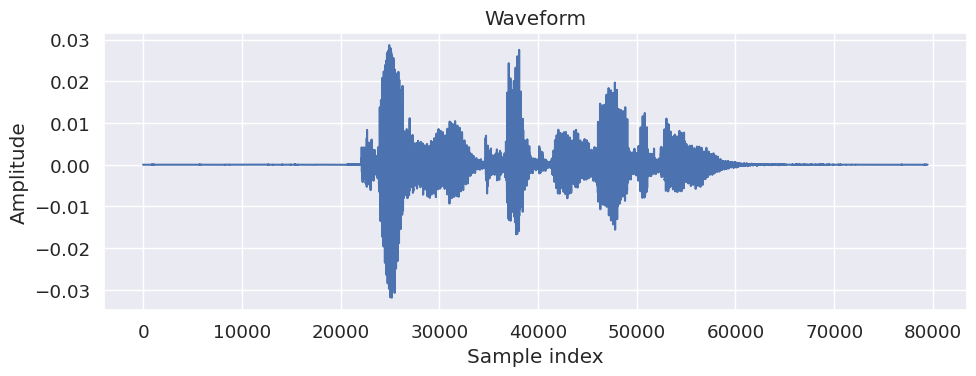

In [50]:

# Plot waveform
plt.figure(figsize=(10, 4))
plt.plot(y)
plt.xlabel('Sample index')
plt.ylabel('Amplitude')
plt.title('Waveform')
plt.tight_layout()

# Show plot
plt.show()

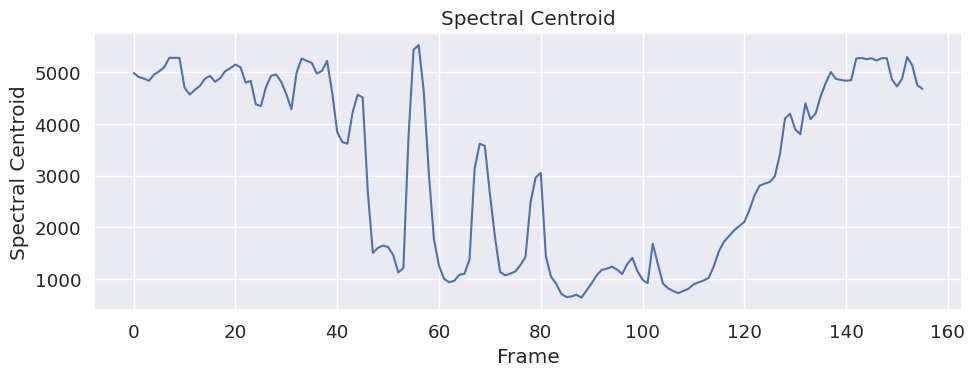

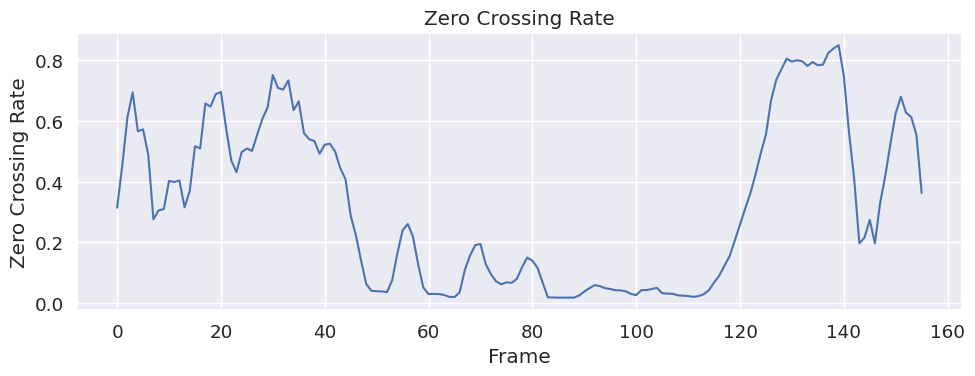

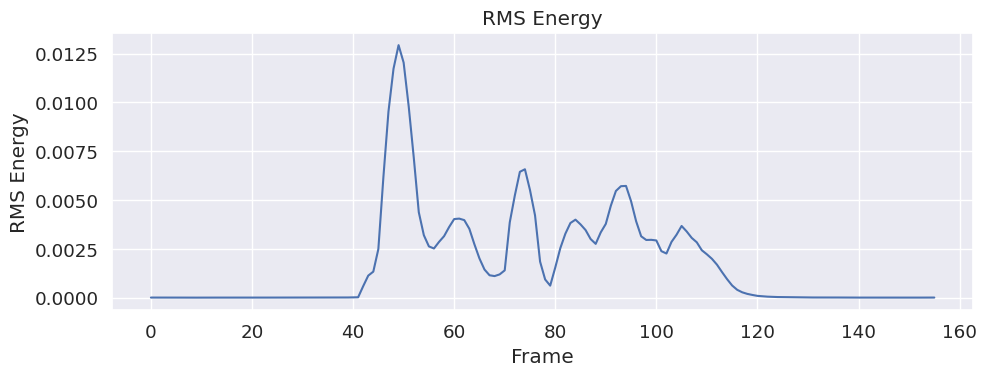

In [51]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Load audio file
y, sr = librosa.load('/kaggle/input/ravdess-emotional-speech-audio/Actor_01/03-01-02-01-01-02-01.wav')

# Extract spectral centroid features
centroids = librosa.feature.spectral_centroid(y=y, sr=sr)

# Extract zero crossing rate features
zcr = librosa.feature.zero_crossing_rate(y=y)

# Extract root mean square (RMS) energy features
rms = librosa.feature.rms(y=y)

# Visualize spectral centroid features
plt.figure(figsize=(10, 4))
plt.plot(centroids.T)
plt.xlabel('Frame')
plt.ylabel('Spectral Centroid')
plt.title('Spectral Centroid')
plt.tight_layout()

# Visualize zero crossing rate features
plt.figure(figsize=(10, 4))
plt.plot(zcr.T)
plt.xlabel('Frame')
plt.ylabel('Zero Crossing Rate')
plt.title('Zero Crossing Rate')
plt.tight_layout()

# Visualize RMS energy features
plt.figure(figsize=(10, 4))
plt.plot(rms.T)
plt.xlabel('Frame')
plt.ylabel('RMS Energy')
plt.title('RMS Energy')
plt.tight_layout()

# Show all plots
plt.show()


## Feature Extraction

In [4]:
# Set feature extraction parameters
n_mfcc = 13
n_fft = 2048
hop_length = 512



In [5]:
# Function to extract MFCC features from each audio file
def extract_mfcc_features(file_path):
    audio, sampling_rate = librosa.load(file_path, sr=22050, duration=None)
    mfccs = librosa.feature.mfcc(y=audio, sr=sampling_rate, n_mfcc=30)
    features = np.mean(mfccs.T, axis=0)
    return features

In [6]:
# Function to extract Mel spectrogram features from each audio file
def extract_mel_features(file_path):
    audio, sampling_rate = librosa.load(file_path, sr=22050, duration=None)
    mel_spec = librosa.feature.melspectrogram(y=audio, sr=sampling_rate, n_mels=128, fmax=8000)
    features = np.mean(mel_spec.T, axis=0)
    return features

In [7]:
# Function to extract chroma features from each audio file
def extract_chroma_features(file_path):
    audio, sampling_rate = librosa.load(file_path, sr=22050, duration=None)
    chroma = librosa.feature.chroma_stft(y=audio, sr=sampling_rate)
    features = np.mean(chroma.T, axis=0)
    return features

In [8]:
# Function to extract contrast features from each audio file
def extract_contrast_features(file_path):
    audio, sampling_rate = librosa.load(file_path, sr=22050, duration=None)
    contrast = librosa.feature.spectral_contrast(y=audio, sr=sampling_rate)
    features = np.mean(contrast.T, axis=0)
    return features

In [9]:
# Function to extract Tonnetz features from each audio file
def extract_tonnetz_features(file_path):
    audio, sampling_rate = librosa.load(file_path, sr=22050, duration=None)
    tonnetz = librosa.feature.tonnetz(y=audio, sr=sampling_rate)
    features = np.mean(tonnetz.T, axis=0)
    return features

## Data Preprocess

In [10]:
def preprocess_data(dataset_path):
    X = []
    y = []
    for folder in os.listdir(dataset_path):
        for file in os.listdir(os.path.join(dataset_path, folder)):
            if file.endswith('.wav'):
                emotion = file.split('-')[2]
                if int(emotion) == 1:
                    label = 'Neutral'
                elif int(emotion) == 2:
                    label = 'Calm'
                elif int(emotion) == 3:
                    label = 'Happy'
                elif int(emotion) == 4:
                    label = 'Sad'
                elif int(emotion) == 5:
                    label = 'Angry'
                elif int(emotion) == 6:
                    label = 'Fearful'
                elif int(emotion) == 7:
                    label = 'Disgust'
                elif int(emotion) == 8:
                    label = 'Surprised'
                else:
                    label = 'UNK'

                file_path = os.path.join(dataset_path, folder, file)
                mfccs = extract_mfcc_features(file_path)
                mel_spec = extract_mel_features(file_path)
                chroma = extract_chroma_features(file_path)
                contrast = extract_contrast_features(file_path)
                tonnetz = extract_tonnetz_features(file_path)
                features = np.concatenate([mfccs, mel_spec, chroma, contrast, tonnetz])
                X.append(features)
                y.append(label)
    return np.array(X), np.array(y)


In [11]:
def plot_confusion_matrix(y_true, y_pred, classes, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 3))
    sns.set(font_scale=1.2)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix For {}'.format(title))
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

## Dataprep


In [12]:
# Preprocess the data
X, y = preprocess_data(dataset_path)

# Print the shape of the feature matrix and the label array
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

    


/opt/conda/lib/python3.7/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=1012
  f"n_fft={n_fft} is too large for input signal of length={y.shape[-1]}"


Shape of X: (1440, 183)
Shape of y: (1440,)


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## SVM
### Linear Kernel

In [14]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Train SVM model
svm = SVC(kernel='linear', gamma='auto')
svm.fit(X_train, y_train)

# Predict on test set
y_pred = svm.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Angry       0.55      0.62      0.58        34
        Calm       0.60      0.62      0.61        40
     Disgust       0.35      0.38      0.36        45
     Fearful       0.45      0.58      0.51        31
       Happy       0.59      0.41      0.49        41
     Neutral       0.19      0.16      0.17        19
         Sad       0.36      0.40      0.38        35
   Surprised       0.66      0.53      0.59        43

    accuracy                           0.48       288
   macro avg       0.47      0.46      0.46       288
weighted avg       0.49      0.48      0.48       288



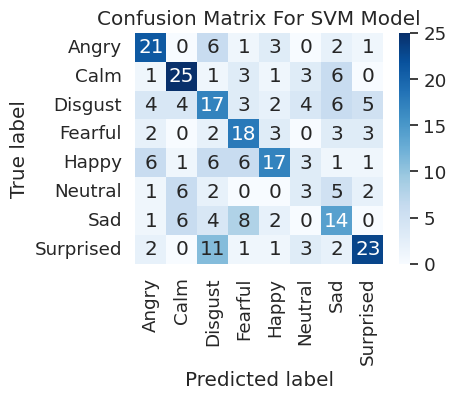

In [15]:
plot_confusion_matrix(y_test, y_pred, np.unique(y_test), 'SVM Model')

## MLP

## Model

In [26]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [27]:
model = MLPClassifier(hidden_layer_sizes=(256, 128), activation='relu',
                          solver='adam', learning_rate_init=0.0001,
                          max_iter=500, batch_size=64, random_state=40)

In [29]:
# Reshape the input data to 2 dimensions
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

In [33]:
model.fit(X_train_flat, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(batch_size=64, hidden_layer_sizes=(256, 128),
              learning_rate_init=0.0001, max_iter=500, random_state=40)

In [36]:
y_pred = model.predict(X_test_flat)

In [38]:
accuracy = model.score(X_test_flat, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.4638888888888889


In [39]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.64      0.71        55
           1       0.79      0.61      0.69        51
           2       0.67      0.70      0.68        37
           3       0.42      0.43      0.43        37
           4       0.55      0.38      0.45        58
           5       0.67      0.57      0.62        21
           6       0.68      0.45      0.54        55
           7       0.67      0.65      0.66        46

   micro avg       0.66      0.55      0.60       360
   macro avg       0.65      0.55      0.60       360
weighted avg       0.66      0.55      0.60       360
 samples avg       0.51      0.55      0.52       360



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
'''
Looking at the results of the two models, it seems like the MLP performed better overall than the SVM. The MLP achieved an overall weighted average F1-score of 0.6, while the SVM only achieved a weighted average F1-score of 0.48. The MLP also achieved higher precision and recall scores for most of the classes compared to the SVM.

It's worth noting that the performance of the models might be affected by the size and quality of the training and testing datasets, as well as the hyperparameters used in training. Therefore, it's recommended to experiment with different models and hyperparameters, as well as increasing the size and diversity of the datasets, in order to achieve better results.
'''

"\nLooking at the results of the two models, it seems like the MLP performed better overall than the SVM. The MLP achieved an overall weighted average F1-score of 0.6, while the SVM only achieved a weighted average F1-score of 0.48. The MLP also achieved higher precision and recall scores for most of the classes compared to the SVM.\n\nIt's worth noting that the performance of the models might be affected by the size and quality of the training and testing datasets, as well as the hyperparameters used in training. Therefore, it's recommended to experiment with different models and hyperparameters, as well as increasing the size and diversity of the datasets, in order to achieve better results.\n"